GEDE BAGUS RAKA NEGARA 
202331142

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

Penjelasannya : Mengimpor pustaka yang diperlukan seperti pandas untuk manipulasi data, 
numpy untuk perhitungan numerik, sklearn untuk model machine learning dan preprocessing, 
serta seaborn dan matplotlib untuk visualisasi data.

In [2]:
# Memuat dataset
dataset = pd.read_csv("R02_rice_field.csv")
dataset

,Production (X),Harvest Area (Y)
0,1329536.00,323589.00
1,1299699.00,329041.00
2,1382905.00,339253.00
3,1419128.00,348223.00
4,1368074.00,337561.00
...,...,...
219,3831923.00,390799.00
220,4090654.00,396559.00
221,2488641.91,511940.93
222,2164089.33,464103.42


In [3]:
dataset.head()

,Production (X),Harvest Area (Y)
0,1329536.0,323589.0
1,1299699.0,329041.0
2,1382905.0,339253.0
3,1419128.0,348223.0
4,1368074.0,337561.0


Penjelasannya : Memuat dataset dari file CSV bernama "R02_rice_field.csv" 
dan menampilkan lima baris pertama dataset untuk mengecek struktur data

In [4]:
# Mengecek missing values
missing_values = dataset.isnull().sum()
print("Missing values per column:", missing_values)

Missing values per column: Production (X)      0
Harvest Area (Y)    0
dtype: int64


Penjelasannya : Mengecek jumlah nilai kosong di setiap kolom dataset untuk memastikan ada tidaknya data yang hilang, 
yang perlu diatasi sebelum melatih model.

In [5]:
# Mengisi nilai yang hilang dengan mean untuk kolom numerik
dataset.fillna(dataset.mean(), inplace=True)


Penjelasannya : Mengisi nilai yang hilang dengan rata-rata kolom untuk setiap kolom numerik, 
memastikan bahwa dataset lengkap dan tidak ada nilai kosong yang bisa mengganggu model.

In [6]:
# Mengatasi outlier menggunakan IQR untuk setiap kolom numerik
for column in dataset.select_dtypes(include=[np.number]).columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1

    # Mengganti nilai outlier dengan batas Q1 atau Q3 sesuai dengan posisinya
    dataset[column] = np.where(dataset[column] < (Q1 - 1.5 * IQR), Q1,
                               np.where(dataset[column] > (Q3 + 1.5 * IQR), Q3, dataset[column]))


Penjelasannya : Menggunakan metode IQR untuk mendeteksi 
dan mengatasi outlier di setiap kolom numerik. Outlier diganti dengan nilai batas Q1 atau Q3.

In [7]:
# Menentukan variabel fitur (X) dan target (y)
X = dataset[['Production (X)']]
y = dataset['Harvest Area (Y)']


Penjelasannya : Menentukan variabel fitur (X) dan variabel target (y). X berisi data produksi, 
dan y berisi area panen sebagai target prediksi.

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Penjelasannya : Menstandardisasi variabel fitur (X) menggunakan StandardScaler, yang mengubah data agar memiliki rata-rata nol 
dan variansi satu untuk meningkatkan kinerja model.

In [9]:
# Membagi data menjadi train dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Penjelasannya : Membagi data menjadi data pelatihan (80%) dan data pengujian (20%), 
memastikan model dapat diuji pada data yang tidak terlihat sebelumnya.

In [10]:
# Membuat model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Penjelasannya : Membangun model regresi linear menggunakan LinearRegression dari sklearn 
dan melatih model dengan data pelatihan (X_train dan y_train).

In [11]:
# Memprediksi hasil untuk data test
y_pred = model.predict(X_test)

# Menghitung skor akurasi (R-squared)
accuracy = r2_score(y_test, y_pred)
print("Model Accuracy (R-squared):", accuracy)

Model Accuracy (R-squared): 0.8546683225108226


Penjelasannya : Menggunakan model terlatih untuk memprediksi nilai target (y_pred) dari data uji (X_test), 
untuk mengukur performa model. Serta, menghitung skor akurasi (R-squared) dari model dengan membandingkan y_test dan y_pred, 
menunjukkan seberapa baik model menjelaskan variasi dalam data.

In [12]:
# Menguji model dengan data dummy
dummy_data = pd.DataFrame([[1500000]], columns=['Production (X)'])
dummy_prediction = model.predict(dummy_data)

print("Prediction for dummy input (Harvest Area):", dummy_prediction)


Prediction for dummy input (Harvest Area): [339990.79845016]


Penjelasannya : Menguji model menggunakan data input dummy (produksi bernilai 1.500.000) 
untuk melihat prediksi area panen yang dihasilkan.

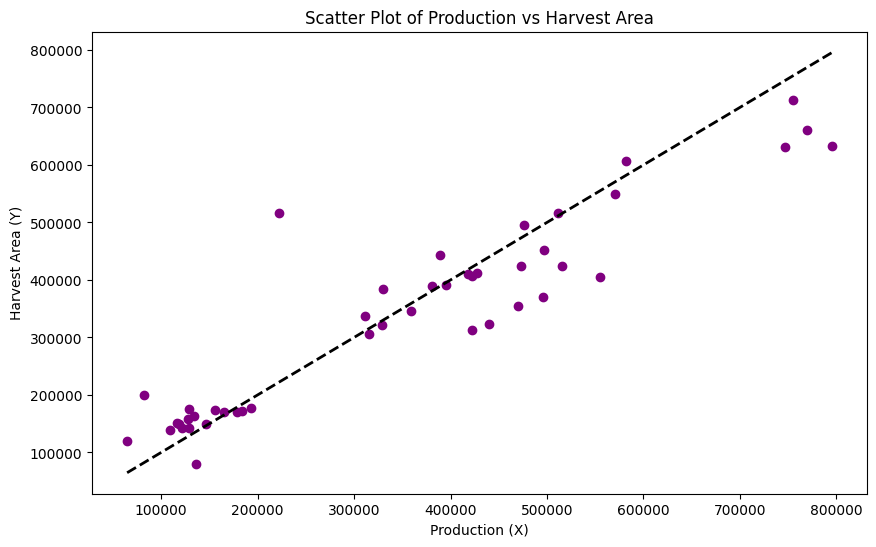

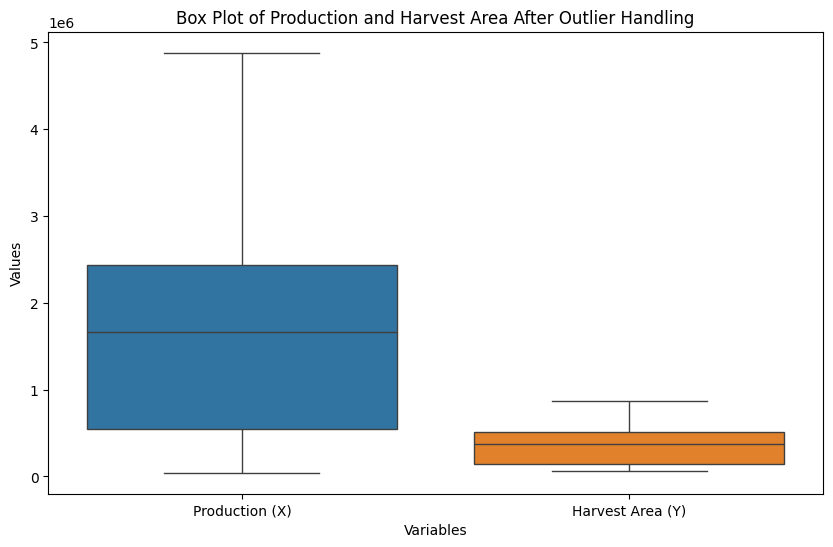

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Production (X)")
plt.ylabel("Harvest Area (Y)")
plt.title("Scatter Plot of Production vs Harvest Area")
plt.show()

# Box plot untuk memeriksa distribusi dan memastikan tidak ada outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset[['Production (X)', 'Harvest Area (Y)']])
plt.title("Box Plot of Production and Harvest Area After Outlier Handling")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.show()


Penjelasannya : Menampilkan plot sebar antara Production (X) dan Harvest Area (Y) untuk melihat pola hubungan antara kedua variabel dalam dataset.
Serta Menampilkan box plot dari variabel Production (X) dan Harvest Area (Y) untuk memeriksa distribusi data dan memastikan bahwa outlier telah diatasi.